# Overview

The goal of this notebook is to help myself become familiar with the power of the matplotlib library.  I will mostly use numpy and pandas as well to help produce data structures to plot.  

# PyPlot Tutorial

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

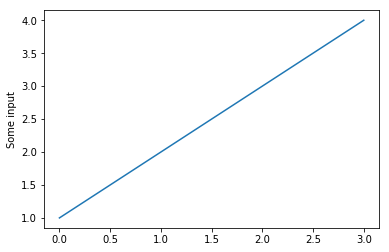

In [2]:
# Plot with single input is assumed to be y-values
plt.plot([1,2,3,4])
plt.ylabel('Some input')
plt.show()


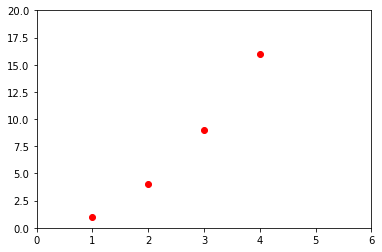

In [3]:
# Some more fine-tuned details, like point formatting and axis limits
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0,6,0,20])
plt.show()

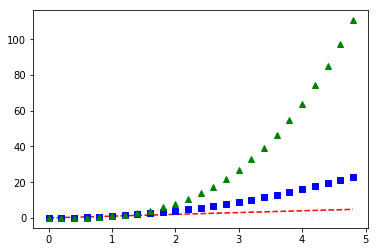

In [6]:
# Plot multiple curves at once
t = np.arange(0., 5., 0.2)

plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

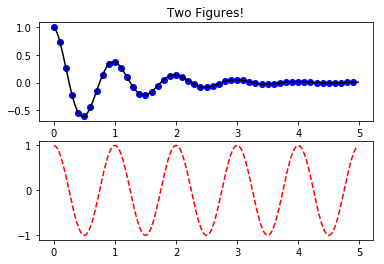

In [14]:
# Can display multiple graphs
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

# Optional, since automatically generated

plt.figure(1)


# Subplot specifies numrows, numcols, fignum
plt.subplot(211)
plt.title('Two Figures!')
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')

plt.show()

# Note: can clear figure or axis with clf() and cla() respectively.  
# Memory not completely released unless command close() given.

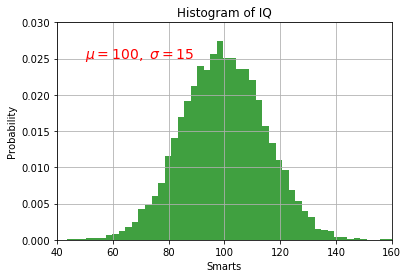

In [17]:
# Example of histogram with text inlay

# Fix random seed
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma*np.random.randn(10000)

# histogram of data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(50, .025, r'$\mu=100,\ \sigma=15$', fontsize=14, color='red')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

# Image Tutorial

In [24]:
# Enter image processing.  We start by formatting images to be 
# inline objects
%matplotlib inline

# Produces array of pixel values
img=plt.imread('stinkbug.png')

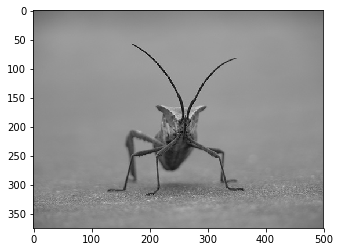

In [25]:
# To see image:
imgplot = plt.imshow(img)

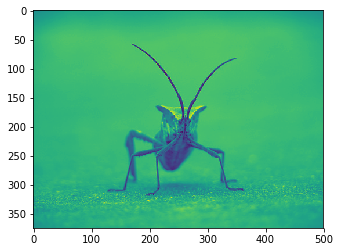

In [26]:
# Force blue to be set to 0
lum_img = img[:,:,0]
plt.imshow(lum_img)

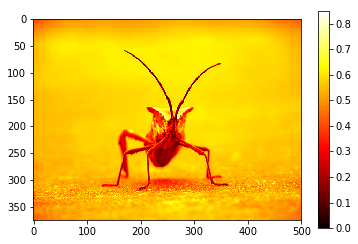

In [30]:
plt.imshow(lum_img, cmap="hot")
plt.colorbar()

# Legend Tutorial


In [31]:
import matplotlib.patches as mpatches

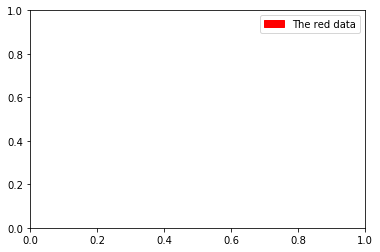

In [32]:
red_patch = mpatches.Patch(color='red', label='The red data')
plt.legend(handles=[red_patch])
plt.show()

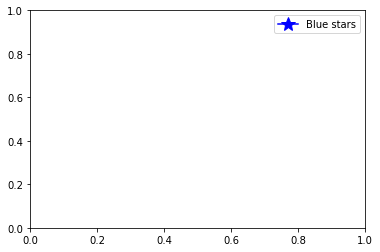

In [35]:
import matplotlib.lines as mlines

blue_line = mlines.Line2D([], [], color='blue', 
                         marker='*', markersize=15, label = 'Blue stars')
plt.legend(handles=[blue_line])
plt.show()

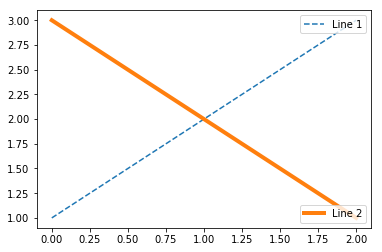

In [43]:
# Legend location
line1, = plt.plot([1,2,3], label="Line 1", linestyle='--')
line2, = plt.plot([3,2,1], label="Line 2", linewidth=4)

first_legend = plt.legend(handles=[line1], loc=1)
ax = plt.gca().add_artist(first_legend)

plt.legend(handles=[line2], loc=4)
plt.show()

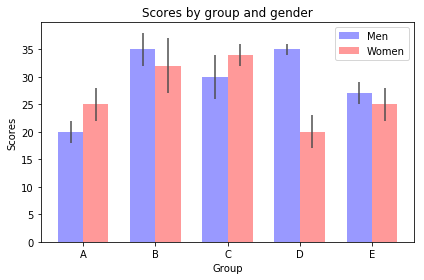

In [44]:
"""
Bar chart demo with pairs of bars grouped for easy comparison.
"""

n_groups = 5

means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)

means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=std_men,
                 error_kw=error_config,
                 label='Men')

rects2 = plt.bar(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='r',
                 yerr=std_women,
                 error_kw=error_config,
                 label='Women')

plt.xlabel('Group')
plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(index + bar_width / 2, ('A', 'B', 'C', 'D', 'E'))
plt.legend()

plt.tight_layout()
plt.show()

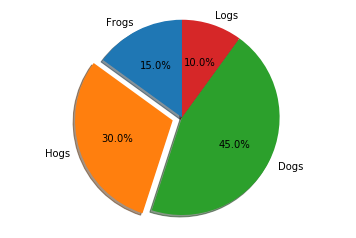

In [46]:
"""
===============
Basic pie chart
===============

Demo of a basic pie chart plus a few additional features.

In addition to the basic pie chart, this demo shows a few optional features:

    * slice labels
    * auto-labeling the percentage
    * offsetting a slice with "explode"
    * drop-shadow
    * custom start angle

Note about the custom start angle:

The default ``startangle`` is 0, which would start the "Frogs" slice on the
positive x-axis. This example sets ``startangle = 90`` such that everything is
rotated counter-clockwise by 90 degrees, and the frog slice starts on the
positive y-axis.
"""

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


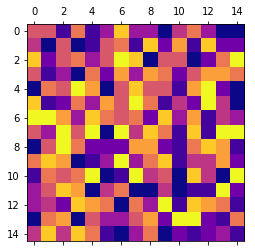

In [55]:
# Example Colormapping matrix
fig, ax = plt.subplots()

min_val, max_val = 0, 15

intersection_matrix = np.random.randint(0, 10, size=(max_val, max_val))

ax.matshow(intersection_matrix, cmap='plasma')

# for i in xrange(15):
#     for j in xrange(15):
#         c = intersection_matrix[j,i]
#         ax.text(i, j, str(c), va='center', ha='center')

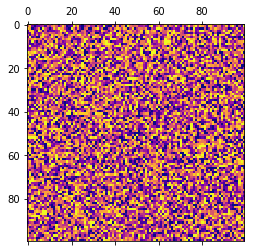

In [58]:
fig, ax = plt.subplots()

mat_a = np.random.randint(0,10, size=(100, 100))
ax.matshow(mat_a, cmap='plasma')

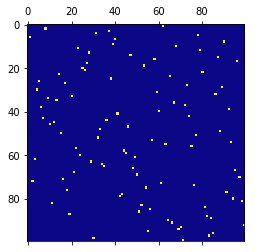

In [63]:
import scipy.linalg

P, L, U = scipy.linalg.lu(mat_a)

fig, ax = plt.subplots()
ax.matshow(P, cmap='plasma')

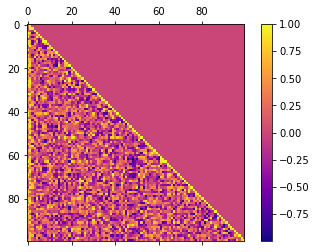

In [66]:
fig, ax = plt.subplots()
mat = ax.matshow(L, cmap='plasma')
plt.colorbar(mat, ax = ax)

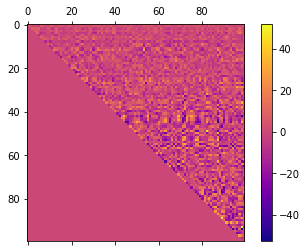

In [67]:
fig, ax = plt.subplots()
mat = ax.matshow(U, cmap='plasma')
plt.colorbar(mat, ax = ax)

# Multinomial Plots with Seaborn

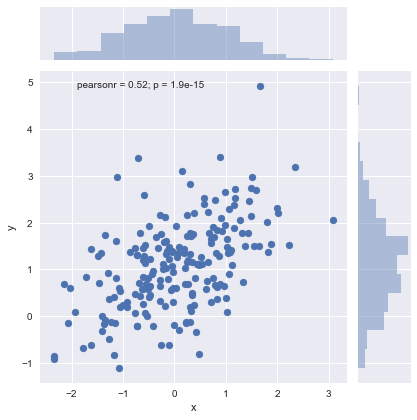

In [68]:
import seaborn as sns

mean, cov = [0,1], [(1,.5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

sns.jointplot(x="x", y="y", data=df)

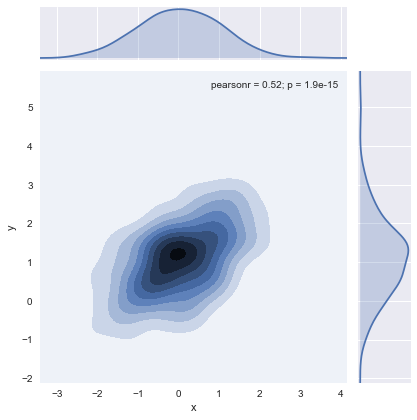

In [69]:
# Kernel density estimation
sns.jointplot(x="x", y="y", data=df, kind="kde")